In [4]:
import pandas as pd
df=pd.read_csv("netflix_customer_churn.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


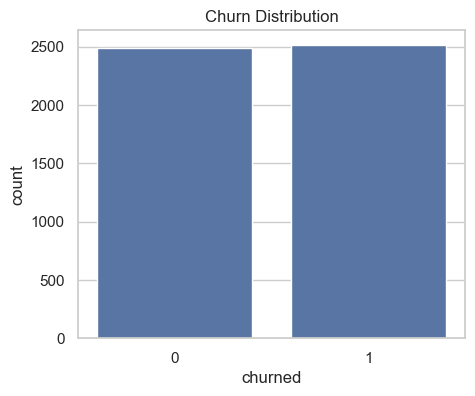

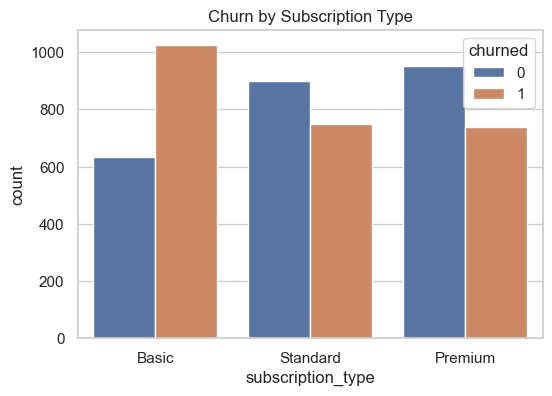

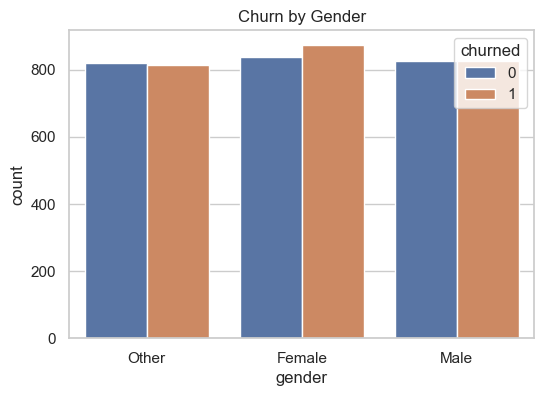

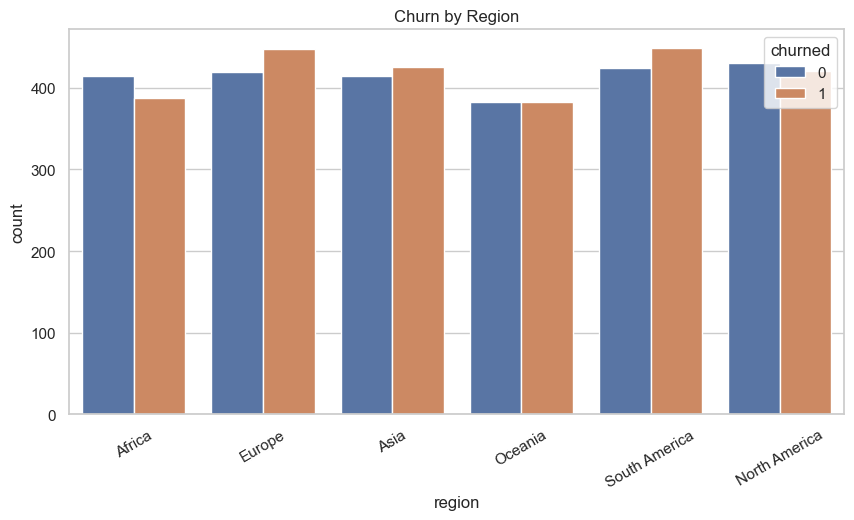

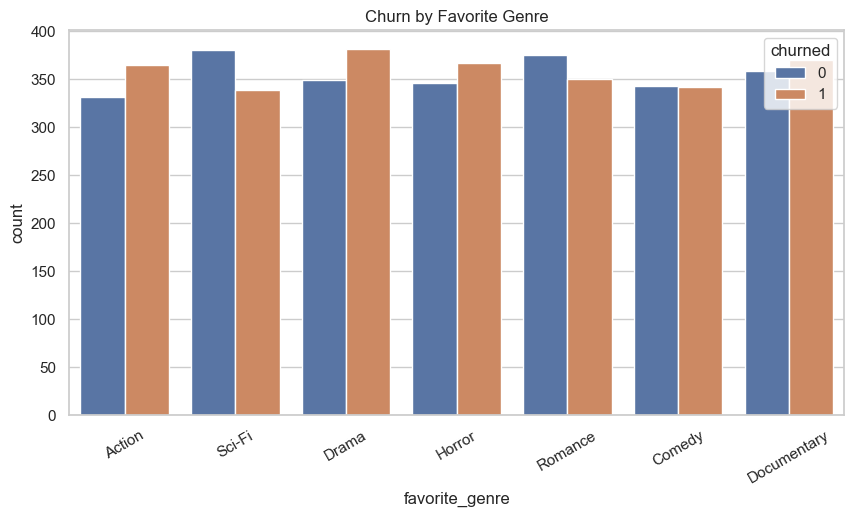

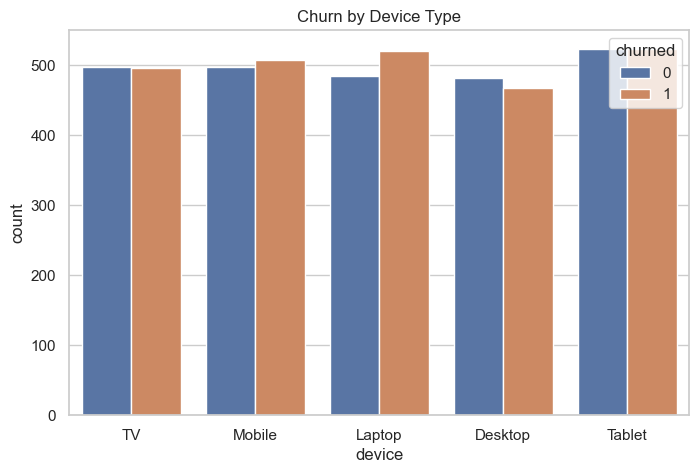

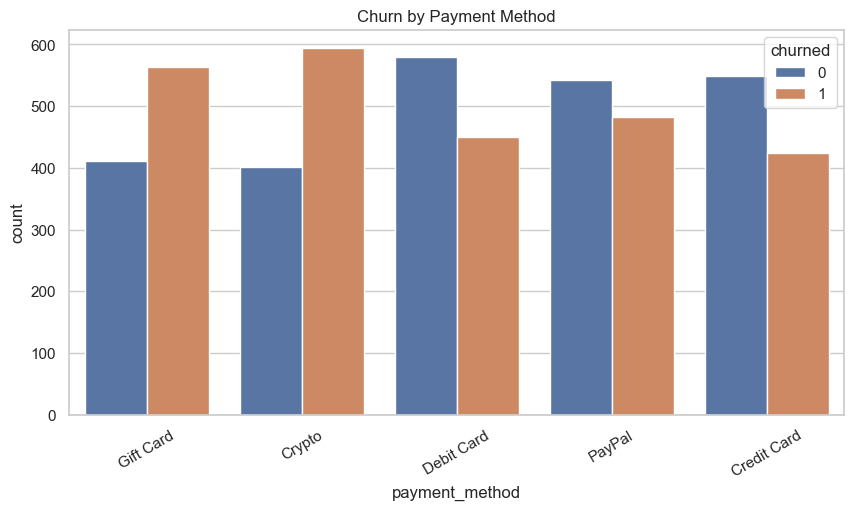

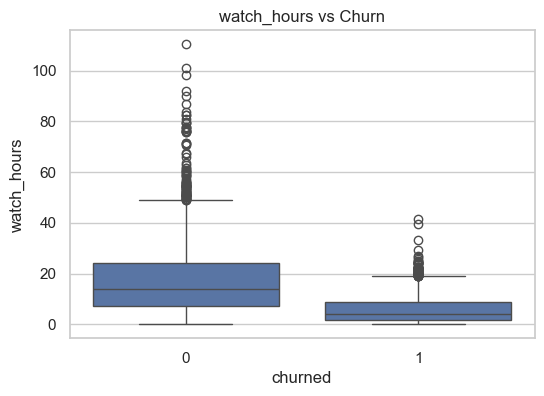

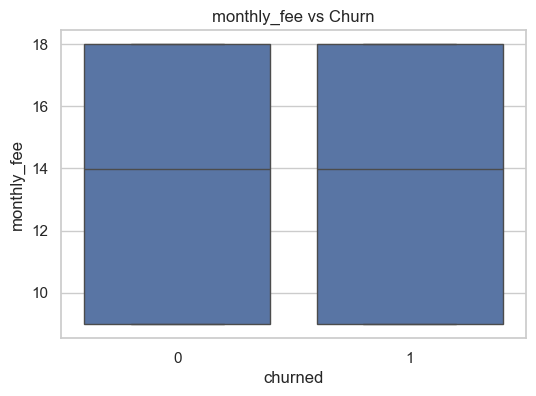

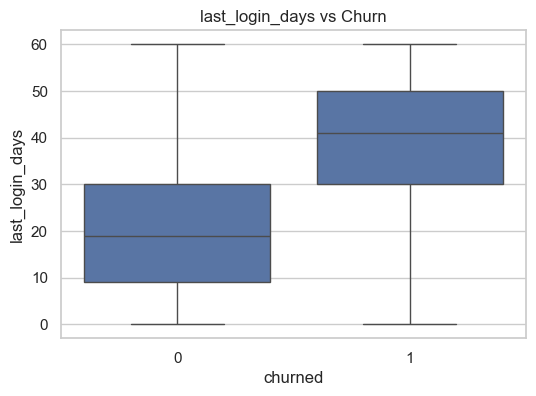

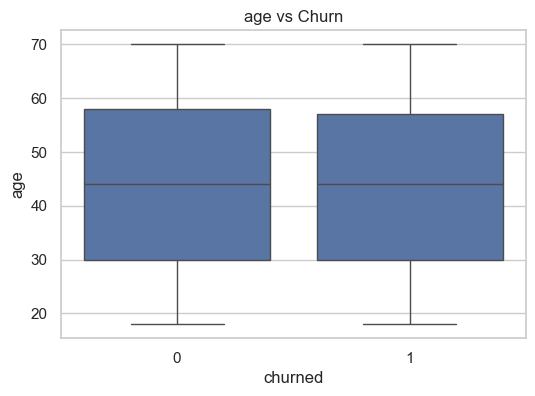

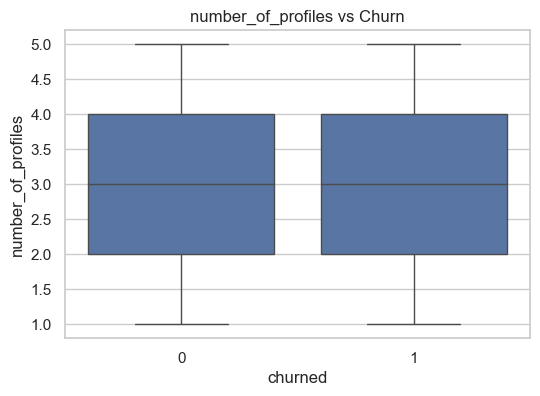

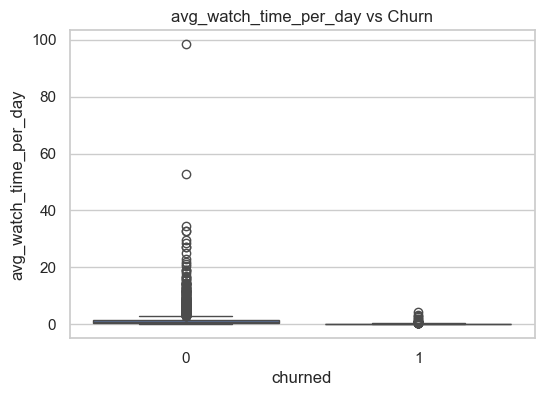

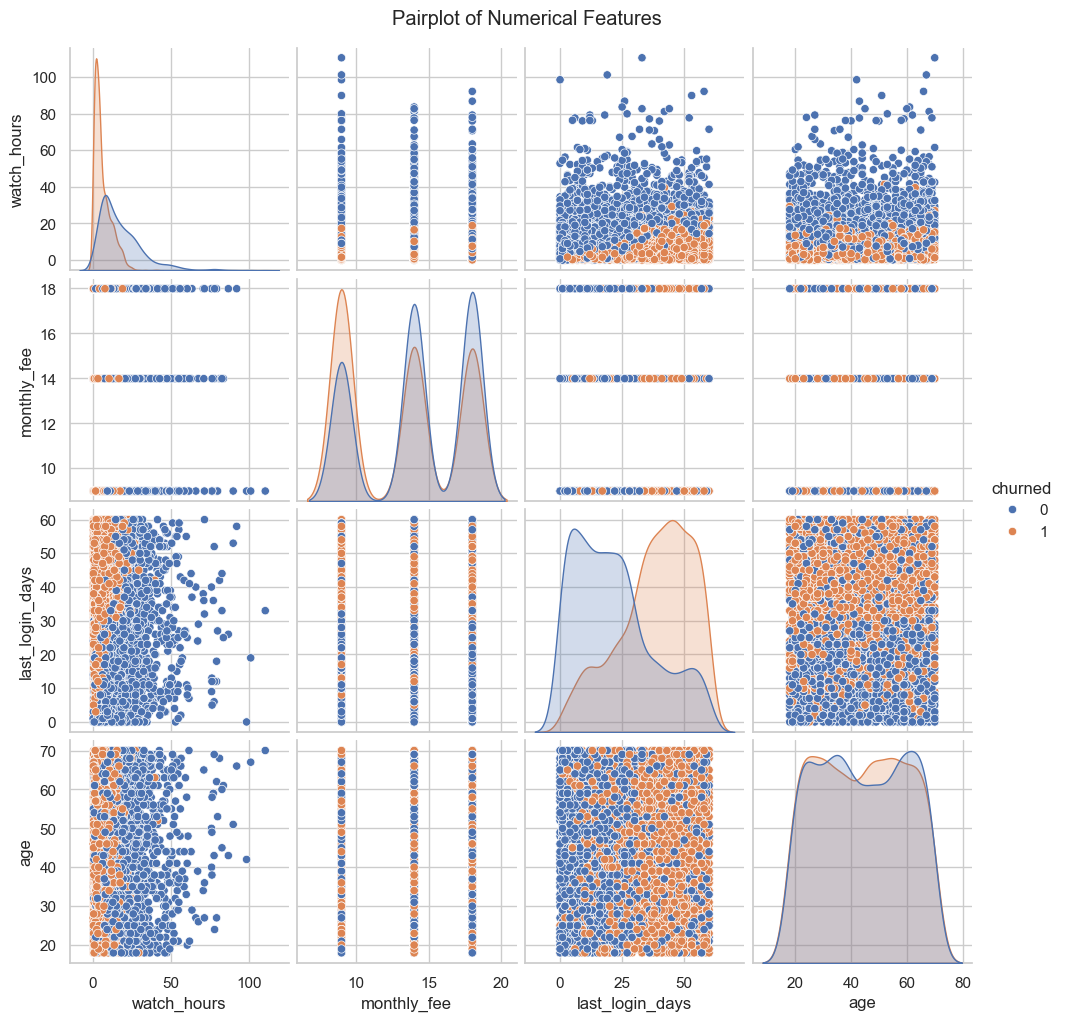

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# 1. Churn distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='churned', data=df)
plt.title("Churn Distribution")
plt.show()

# 2. Subscription Type vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='subscription_type', hue='churned', data=df)
plt.title("Churn by Subscription Type")
plt.show()

# 3. Gender vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='churned', data=df)
plt.title("Churn by Gender")
plt.show()

# 4. Region vs Churn
plt.figure(figsize=(10, 5))
sns.countplot(x='region', hue='churned', data=df)
plt.title("Churn by Region")
plt.xticks(rotation=30)
plt.show()

# 5. Favorite Genre vs Churn
plt.figure(figsize=(10, 5))
sns.countplot(x='favorite_genre', hue='churned', data=df)
plt.title("Churn by Favorite Genre")
plt.xticks(rotation=30)
plt.show()

# 6. Device vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='device', hue='churned', data=df)
plt.title("Churn by Device Type")
plt.show()

# 7. Payment Method vs Churn
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_method', hue='churned', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()

# 8. Numerical Feature Distributions (Boxplots)
num_cols = ['watch_hours', 'monthly_fee', 'last_login_days', 'age', 'number_of_profiles', 'avg_watch_time_per_day']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churned', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

# 9. Pairplot (just a few important features to avoid clutter)
sns.pairplot(df[['watch_hours', 'monthly_fee', 'last_login_days', 'age', 'churned']], hue='churned')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


In [6]:
df_encoded = pd.get_dummies(df, columns=['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre'], drop_first=True)

In [7]:
df_encoded.head()

,customer_id,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,a9b75100-82a8-427a-a208-72f24052884a,51,14.73,29,8.99,1,1,0.49,False,True,...,False,False,True,False,False,False,False,False,False,False
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,0.70,19,13.99,1,5,0.03,False,True,...,False,False,True,False,False,False,False,False,False,True
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,16.32,10,13.99,0,2,1.48,False,False,...,True,False,False,False,False,False,True,False,False,False
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,4.51,12,17.99,1,2,0.35,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,1.89,13,13.99,1,2,0.13,False,True,...,True,False,False,False,False,False,False,False,False,False


In [8]:
df_encoded.drop(columns=['customer_id'], inplace=True)
df_encoded.head()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,1,0.49,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,47,0.70,19,13.99,1,5,0.03,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,27,16.32,10,13.99,0,2,1.48,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,53,4.51,12,17.99,1,2,0.35,False,True,True,...,True,False,False,False,False,False,False,True,False,False
4,56,1.89,13,13.99,1,2,0.13,False,True,False,...,True,False,False,False,False,False,False,False,False,False


In [9]:
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
df_encoded.head()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,1,0.49,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,47,0.70,19,13.99,1,5,0.03,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,27,16.32,10,13.99,0,2,1.48,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,53,4.51,12,17.99,1,2,0.35,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,56,1.89,13,13.99,1,2,0.13,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
X = df_encoded.drop('churned', axis=1)
y = df_encoded['churned']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.46147063,  0.25642504, -0.06215238, ..., -0.40781953,
        -0.41181385, -0.41015156],
       [ 0.20339909, -0.91143244, -0.63246235, ..., -0.40781953,
        -0.41181385,  2.43812314],
       [-1.08695864,  0.38877668, -1.14574131, ..., -0.40781953,
        -0.41181385, -0.41015156],
       ...,
       [ 1.42923893,  0.40792188,  1.07846755, ..., -0.40781953,
        -0.41181385, -0.41015156],
       [ 0.97761372, -0.21055147, -1.54495829, ..., -0.40781953,
        -0.41181385,  2.43812314],
       [ 0.84857795, -0.83485162, -0.74652434, ..., -0.40781953,
        -0.41181385, -0.41015156]])

In [11]:
X.head()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,subscription_type_Standard,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,0.49,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,47,0.70,19,13.99,5,0.03,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
2,27,16.32,10,13.99,2,1.48,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,53,4.51,12,17.99,2,0.35,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,56,1.89,13,13.99,2,0.13,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
X_train

array([[-1.34503018, -0.63424317, -1.54495829, ..., -0.40781953,
         2.42828164, -0.41015156],
       [-1.53858384, -0.7291368 , -0.97464832, ..., -0.40781953,
        -0.41181385,  2.43812314],
       [-1.66761961, -0.3329143 ,  1.07846755, ..., -0.40781953,
        -0.41181385, -0.41015156],
       ...,
       [ 1.49375681, -0.11732265, -1.08871032, ..., -0.40781953,
         2.42828164, -0.41015156],
       [-0.312744  , -0.30461269,  1.13549855, ..., -0.40781953,
        -0.41181385, -0.41015156],
       [-0.95792286, -0.83984602, -1.14574131, ...,  2.45206499,
        -0.41181385, -0.41015156]])

🔹 Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       497
           1       0.88      0.90      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



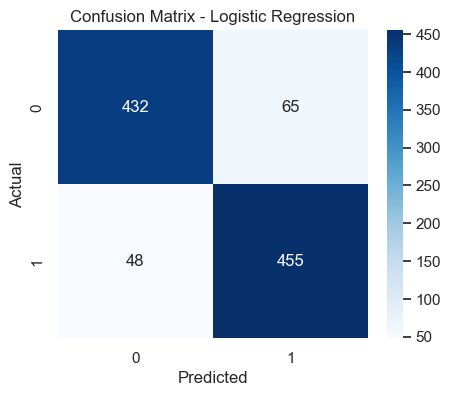

🔹 Random Forest Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       497
           1       0.99      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



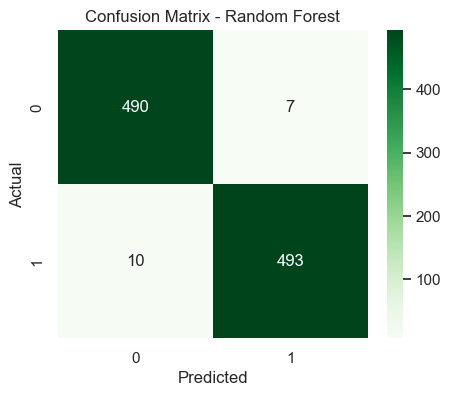

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Logistic Regression (Baseline)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("🔹 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Random Forest (nonlinear)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
rf.score(X_test, y_test)

0.983

In [16]:
import joblib

joblib.dump(rf, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [17]:
feature_cols = X.columns.tolist()
joblib.dump(feature_cols, 'features.pkl')


['features.pkl']

In [18]:
import pickle
with open('columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)


In [19]:
import joblib

# Load the saved model
model = joblib.load('model.pkl')


In [20]:
scaler = joblib.load('scaler.pkl')
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)


C:\Users\Deepti Bhardwaj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
